In this task we have to implement a linear regression. Specifically you are required to implement following four functions:


In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
#Cutomize the Matplotlib for beautiful plots...
import dmStyle # download the file from slate
dmStyle.customize_mpl()

Setting custom matplotlib visual style


In [10]:
import pandas as pd
import numpy as np

#Let's Load Some Real Data

In [11]:
rd=pd.read_csv('./data/reg-data.txt')
rd.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [12]:
X=rd.ix[:,0].values # 
Y=rd.ix[:,1].values

In [13]:
#reshape the data for simplifying the computations....
if X.ndim==1:
    X=X.reshape((len(X),1))
Y=Y.reshape((len(Y),1))
print X.shape, Y.shape

(96L, 1L) (96L, 1L)


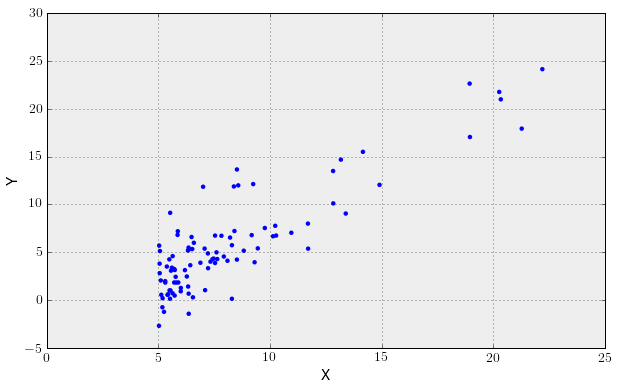

In [7]:
#plot the data...
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

Lets append a vector of dummy 1's at the start of X to simplify the calculations...

Now by adding an extra column to our X input matrix we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=[\theta_0\;\;\;\; \theta_1] \begin{bmatrix}1\\ x^i\end{bmatrix}$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.

In [14]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((np.ones((X.shape[0],1)),X))

In [15]:
print X 

[[  1.       5.5277]
 [  1.       8.5186]
 [  1.       7.0032]
 [  1.       5.8598]
 [  1.       8.3829]
 [  1.       7.4764]
 [  1.       8.5781]
 [  1.       6.4862]
 [  1.       5.0546]
 [  1.       5.7107]
 [  1.      14.164 ]
 [  1.       5.734 ]
 [  1.       8.4084]
 [  1.       5.6407]
 [  1.       5.3794]
 [  1.       6.3654]
 [  1.       5.1301]
 [  1.       6.4296]
 [  1.       7.0708]
 [  1.       6.1891]
 [  1.      20.27  ]
 [  1.       5.4901]
 [  1.       6.3261]
 [  1.       5.5649]
 [  1.      18.945 ]
 [  1.      12.828 ]
 [  1.      10.957 ]
 [  1.      13.176 ]
 [  1.      22.203 ]
 [  1.       5.2524]
 [  1.       6.5894]
 [  1.       9.2482]
 [  1.       5.8918]
 [  1.       8.2111]
 [  1.       7.9334]
 [  1.       8.0959]
 [  1.       5.6063]
 [  1.      12.836 ]
 [  1.       6.3534]
 [  1.       5.4069]
 [  1.       6.8825]
 [  1.      11.708 ]
 [  1.       5.7737]
 [  1.       7.8247]
 [  1.       7.0931]
 [  1.       5.0702]
 [  1.       5.8014]
 [  1.      1

In [1]:
def hypothesis(X,theta):
    nro = X.shape[0]
    nco = 1
    vla = 0
    h = np.zeros(shape=(nrows, 1))
    for i in range(len(X)):
        
        for aa, bb in zip(X[i], theta):
            vla = vla + (aa * bb)
            
        h[i] = h[i] + vla
    
    return h

In [2]:
def cost_function(theta,X,Y):
    
    nexamples = X.shape
    answ = 0
    for i in range(len(X)):
        answ = answ + ((hypothesis(np.array([X[i]]), theta)[0][0] - Y[i]) ** 2)
    return (answ / (2 * nexamples))[0]

In [3]:
def derivative_cost_function(theta,X,Y):
    nexamples, nfeatures = X.shape
    
    partialderivatives = np.zeros(shape=(nfeatures, 1))
    
    for aa in range(nfeatures):
        for bb in enumerate(X):
            answ = (hypothesis(np.array([X[bb]]), theta)[0][0] - Y[bb]) * row[aa]
        partialderivatives[aa] = answ / nexamples
        
    return partialderivatives


In [23]:
#Lets test your hypothesis for with random parameters...
thetas=np.array([2.0, -3.0]).reshape(2,1)
print hypothesis(X[1:5,:],thetas) # Your code should give the following output
#[[-23.5558]
# [-19.0096]
# [-15.5794]
# [-23.1487]]

[[-23.5558]
 [-19.0096]
 [-15.5794]
 [-23.1487]]


In [70]:
#Lets test your cost function...
print cost_function(thetas,X,Y) # the correct answer should be 535.327234221

535.327234221


#Plot of Cost Function
Lets plot the cost function for thetas in a thin range (this range is chosen randomly), i.e. [-5,5]

In [15]:
step=0.5
t0=arange(-5,+5,step) # define the range of theta_0
t1=arange(-5,+5,step)# define the range of theta_1
ecf=np.zeros((len(t0),len(t1))) # 2D array to hold value of cost function 

for i in range(len(t0)):
    for j in range(len(t1)):
        #creat a vector of theta_s
        th=np.array([t0[i],t1[j]]).reshape((2,1))
        ecf[i,j]=cost_function(th,X,Y)

In [16]:
print ecf


[[ 1624.14334199  1376.82097     1149.96435096   943.57348487
    757.64837172   592.18901152   447.19540427   322.66754996
    218.60544861   135.00910019    71.87850473    29.21366221
      7.01457264     5.28123602    24.01365235    63.21182162
    122.87574384   203.00541901   303.60084712   424.66202818]
 [ 1598.4571097   1353.18002547  1128.36869419   924.02311586
    740.14329047   576.72921803   433.78089854   311.29833199   209.2815184
    127.73045775    66.64515004    26.02559529     5.87179348
      6.18374462    26.9614487     68.20490573   129.91411571
    212.08907864   314.72979452   437.83626334]
 [ 1573.02087741  1329.78908094  1107.02303742   904.72274685
    722.88820922   561.51942454   420.61639281   300.17911403
    200.20758819   120.7018153     61.66179536    23.08752836
      4.97901431     7.33625321    30.15924506    73.44798985
    137.20248759   221.42273828   326.10874191   451.26049849]
 [ 1547.83464512  1306.64813641  1085.92738065   885.67237784
    70

In [17]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1) # meshgrid generate the indeces for our 2D plotting, see its help for further understanding
print tX.shape, tY.shape, ecf.shape

(20L, 20L) (20L, 20L) (20L, 20L)


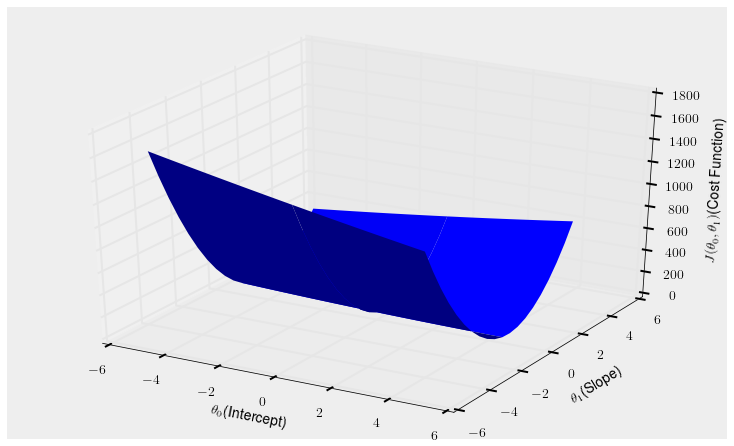

In [18]:
#Plot the cost function...
#%matplotlib inline #%matplotlib qt # replace this line with 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
ax.set_xlabel(r'$\theta_0$(Intercept)')
ax.set_ylabel(r'$\theta_1$(Slope)')
ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

#You must get something similar...

##Lets test your derivatives

Lets compute the computational derivatives and their difference with analytical derivatives.

We will be using the definitions of partial derivatives to compute the computational derivatives of our cost function $J(\theta_0,\theta_1)$. i.e.
For $\partial \theta_0$
$$\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0}=\frac{J(\theta_0+\epsilon,\theta_1)-J(\theta_0,\theta_1)}{\epsilon}$$


For $\partial \theta_1$
$$\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1}=\frac{J(\theta_0,\theta_1+\epsilon)-J(\theta_0,\theta_1)}{\epsilon}$$

Remember we are looking for change in both directions ($\theta_0+\epsilon,\;\mbox{and}\; \theta_1+\epsilon$) from the current position $(\theta_0,\theta_1)$. In other words the values of $J(\theta_0,\theta_1)$ will remain constant for both computations.


In [18]:
print thetas,len(thetas)

[[ 2.]
 [-3.]] 2


In [19]:
eps=0.00001
#analytical derivative
ad=derivative_cost_function(thetas,X,Y)
print ad # answer should be
#[[ -28.2601625 ]
# [-294.11641606]]

[[ -28.2601625 ]
 [-294.11641606]]


In [20]:

eps=0.0001
cd=[]

for i in range(len(thetas)):
    tt=thetas.copy()
    tt[i]=tt[i]+eps # add an epsilon for the current theta
    print 'diff in direction', tt-thetas    
    cd.append((cost_function(tt,X,Y)-cost_function(thetas,X,Y))/eps)

print 'Computational derivatvie =',cd
print 'Analytical derivative =', ad.shape,ad.T
print 'Their difference=',np.reshape(cd,ad.shape)-ad

diff in direction [[ 0.0001]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.0001]]
Computational derivatvie = [-28.260112500220202, -294.11232290499356]
Analytical derivative = (2L, 1L) [[ -28.2601625  -294.11641606]]
Their difference= [[  4.99997798e-05]
 [  4.09315031e-03]]


!!So for so good

#Gradient Descent

Now lets write the code for the gradient descent.

In [4]:
#Gradient Descent...
 # Uncomment it if you want to debug your code of gradient descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000):
    # Remember you must plot the cost function after set of iterations to
    # check whether your gradient descent code is working fine or not...
    eps = 0.00001
    alpha = 0.01
    
    nexamples = float(X.shape[0])
    thetas = rand(X.shape[1],1)
    
    answ = 0
    t_old = thetas.tolist()
    t_new = thetas.tolist()
    
    flag = True
    while answ < maxniter: 
        t_old = t_new
        t_new = t_new - alpha * derivative_cost_function(np.array(t_old), X, Y)
        answ = answ + 1
    return t_new

Value of Cost Function at Minimum Points [[-4.21144905]
 [ 1.21354175]], is 3.45958190343


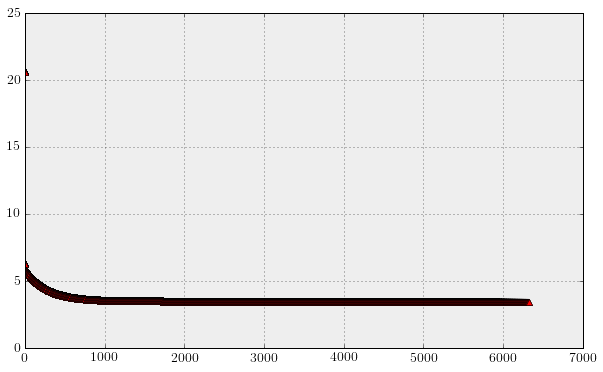

In [29]:
theta = GradientDescent(X,Y,cost_function,derivative_cost_function)
cost_value = cost_function(theta, X, Y)

print "Value of Cost Function at Minimum Points ", theta, ", is ", cost_value



In [24]:
print theta # You must get following values of theata after the successful completion of gradient descent...

[[-4.21144901]
 [ 1.21354175]]


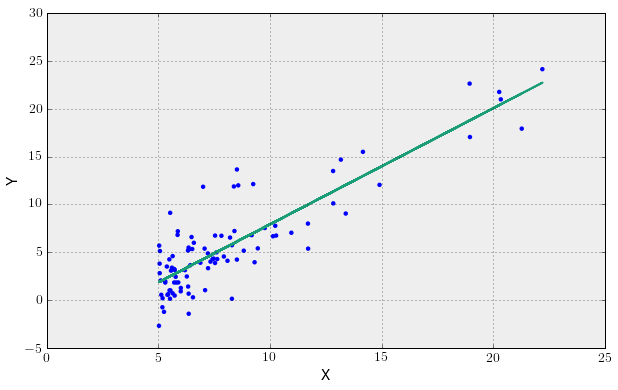

In [25]:
plt.scatter(X[:,1],Y)
plt.xlabel('X')
plt.ylabel('Y')
#Now for each X plot the line
plt.plot(X[:,1],hypothesis(X,theta))